In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score




# Load CSV into DataFrame

In [178]:
df = pd.read_csv("/Users/alexanderfrankow/Desktop/Python/myenv/CSV/SupplyChain.csv")
df = df.drop(df.columns[0], axis=1)
df.set_index(df.columns[0], inplace=True)
df.head(20)

,QI,Machine,PreCheck,NumberPins,BoardID,Price,BoardCategory,MaterialOrigin
ID,,,,,,,,
1,0,3.0,0,22.0,A/5 21171,7.2500,NaN,S
2,1,1.0,1,38.0,PC 17599,71.2833,C85,C
3,1,3.0,1,26.0,STON/O2. 3101282,7.9250,NaN,S
4,1,1.0,1,35.0,113803,53.1000,C123,S
5,0,3.0,0,35.0,373450,8.0500,NaN,S
6,0,3.0,0,NaN,330877,8.4583,NaN,Q
7,0,1.0,0,54.0,17463,51.8625,E46,S
8,0,3.0,0,2.0,349909,21.0750,NaN,S
9,1,3.0,1,27.0,347742,11.1333,NaN,S


# Display basic information


In [179]:
print(df.info())
print(f"The DataFrame has {df.shape[0]} observations with {df.shape[1]} columns")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   QI              891 non-null    int64  
 1   Machine         802 non-null    float64
 2   PreCheck        891 non-null    int64  
 3   NumberPins      714 non-null    float64
 4   BoardID         891 non-null    object 
 5   Price           880 non-null    float64
 6   BoardCategory   204 non-null    object 
 7   MaterialOrigin  889 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB
None
The DataFrame has 891 observations with 8 columns
               QI     Machine    PreCheck  NumberPins       Price
count  891.000000  802.000000  891.000000  714.000000  880.000000
mean     0.383838    2.301746    0.352413   29.699118   32.332125
std      0.486592    0.836867    0.477990   14.526497   49.964536
min      0.000000    1.000000    0.000000    0.420000    0.000000
25%

# Data Preprocessing
# Convert relevant columns to categorical

In [180]:
cols_to_categorical = ['QI', 'Machine', 'PreCheck', 'BoardID', 'BoardCategory', 'MaterialOrigin']
df[cols_to_categorical] = df[cols_to_categorical].astype('category')
df['NumberPins'] = df['NumberPins'].round().astype('Int64')


# Handle missing values


In [181]:
nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)

print(contingency_table)

                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                    89               802                     9.99
PreCheck                    0               891                     0.00
NumberPins                177               714                    19.87
BoardID                     0               891                     0.00
Price                      11               880                     1.23
BoardCategory             687               204                    77.10
MaterialOrigin              2               889                     0.22


# Box Plots for Outlier Detection


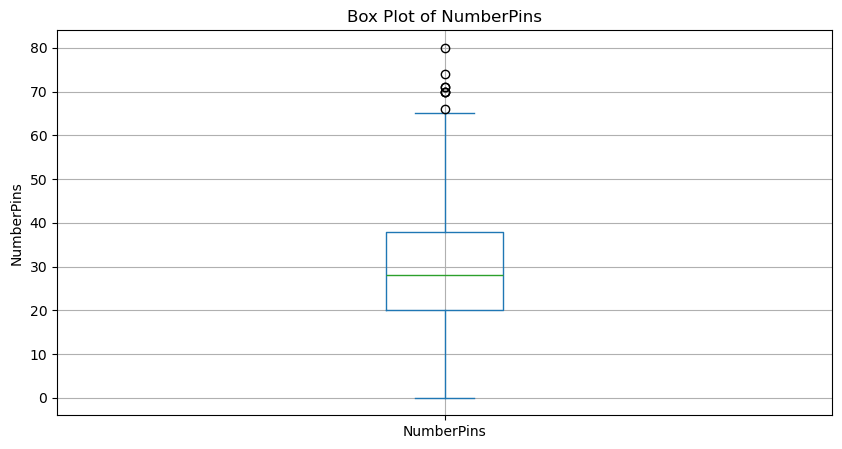

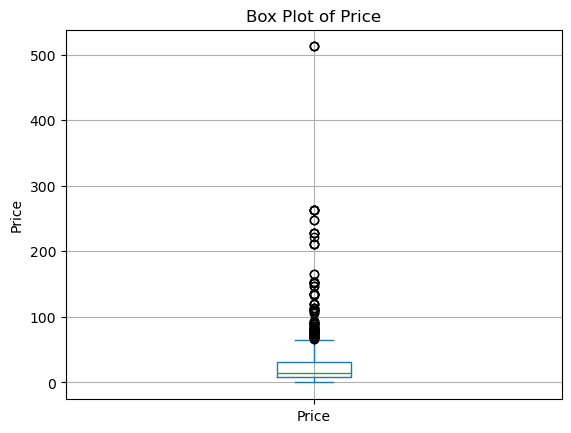

In [182]:
plt.figure(figsize=(10,5))
df['NumberPins'].plot.box(title="Box Plot of NumberPins")
plt.ylabel("NumberPins")
plt.grid(True)
plt.show()

df['Price'].plot.box(title="Box Plot of Price")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Outlier Treatment using IQR and Replot


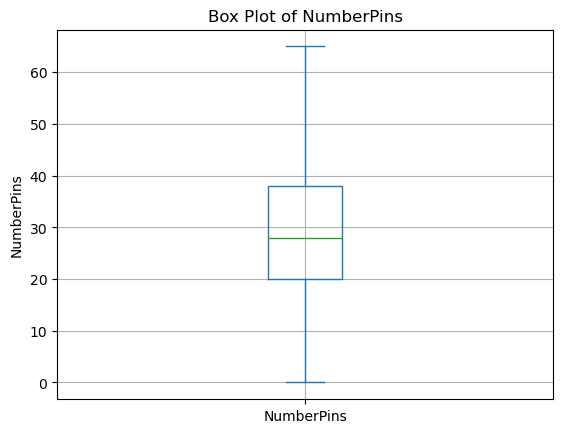

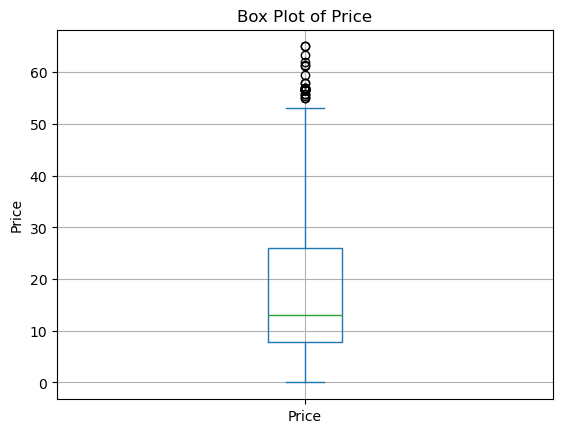

In [183]:
Q1 = df['NumberPins'].quantile(0.25)
Q3 = df['NumberPins'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
df.loc[df['NumberPins'] > upper_fence, 'NumberPins'] = np.nan
df['NumberPins'].plot.box(title="Box Plot of NumberPins")
plt.ylabel("NumberPins")
plt.grid(True)
plt.show()

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
df.loc[df['Price'] > upper_fence, 'Price'] = np.nan
df['Price'].plot.box(title="Box Plot of Price")
plt.ylabel("Price")
plt.grid(True)
plt.show()


# Handle Missing Values


In [184]:
nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)
print(contingency_table)



                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                    89               802                     9.99
PreCheck                    0               891                     0.00
NumberPins                185               706                    20.76
BoardID                     0               891                     0.00
Price                     127               764                    14.25
BoardCategory             687               204                    77.10
MaterialOrigin              2               889                     0.22


In [185]:
df['NumberPins'] = df['NumberPins'].fillna(round(df['NumberPins'].mean())).astype(int).astype('Int64')
df['Machine'] = df['Machine'].fillna(df['Machine'].mode()[0])
df['Price'] = df['Price'].fillna(df['Price'].mean())

nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)
print(contingency_table)

                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                     0               891                     0.00
PreCheck                    0               891                     0.00
NumberPins                  0               891                     0.00
BoardID                     0               891                     0.00
Price                       0               891                     0.00
BoardCategory             687               204                    77.10
MaterialOrigin              2               889                     0.22


# Data Visualization


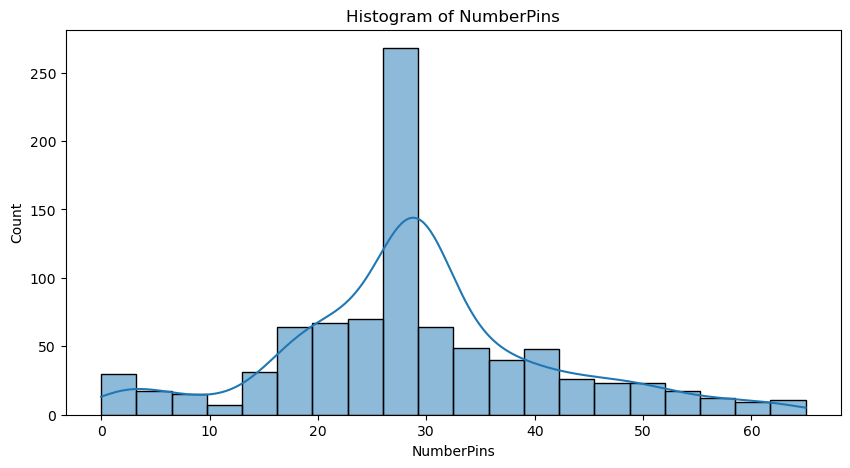

In [186]:
plt.figure(figsize=(10,5))
sns.histplot(df['NumberPins'].dropna(), bins=20, kde=True)
plt.title("Histogram of NumberPins")
plt.show()



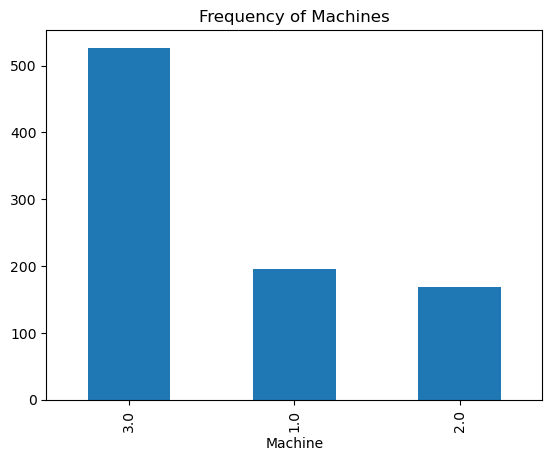

In [187]:
df['Machine'].value_counts().plot(kind='bar', title="Frequency of Machines")
plt.show()

In [188]:
contingency_table = pd.crosstab(df['QI'], df['PreCheck'])
print(contingency_table)
print("In percentage:")
prop_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(prop_table)
contingency_table = pd.crosstab(df['QI'], df['Machine'])
print(contingency_table)

PreCheck    0    1
QI                
0         468   81
1         109  233
In percentage:
PreCheck         0         1
QI                          
0         0.852459  0.147541
1         0.318713  0.681287
Machine  1.0  2.0  3.0
QI                    
0         74   87  388
1        122   81  139


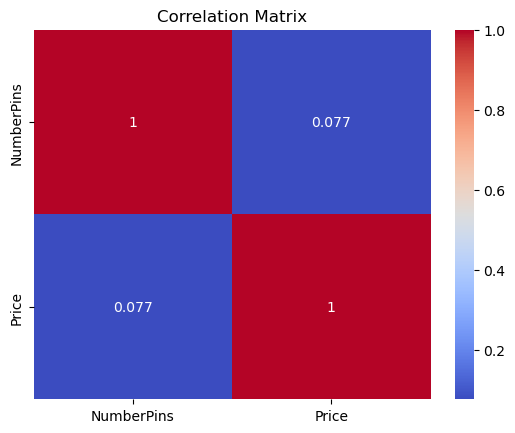

In [189]:
corr_matrix = df[['NumberPins', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Clustering Analysis

## k-means Clustering

In [190]:
# Select numerical variables
kmeans_data = df[['NumberPins', 'Price']]
kmeans_data_scaled = StandardScaler().fit_transform(kmeans_data)

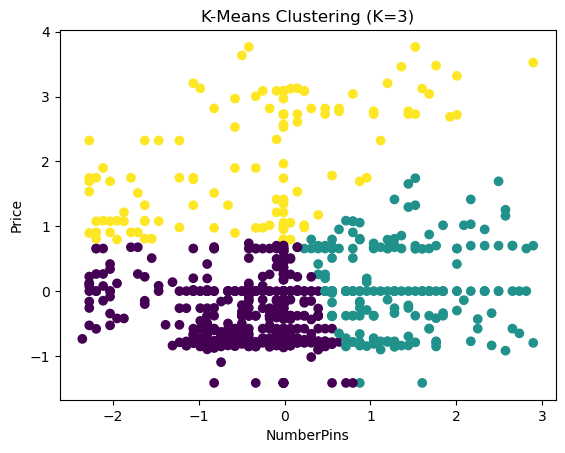

In [191]:
kmeans_data = df[['NumberPins', 'Price']]
kmeans_data_scaled = StandardScaler().fit_transform(kmeans_data)
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=12345)
df['Cluster_means'] = kmeans.fit_predict(kmeans_data_scaled)
plt.scatter(kmeans_data_scaled[:, 0], kmeans_data_scaled[:, 1], c=df['Cluster_means'], cmap='viridis')
plt.xlabel("NumberPins")
plt.ylabel("Price")
plt.title(f"K-Means Clustering (K={k})")
plt.show()

In [192]:
df.head(20)

,QI,Machine,PreCheck,NumberPins,BoardID,Price,BoardCategory,MaterialOrigin,Cluster_means
ID,,,,,,,,,
1,0,3.0,0,22,A/5 21171,7.250000,NaN,S,0
2,1,1.0,1,38,PC 17599,17.762357,C85,C,1
3,1,3.0,1,26,STON/O2. 3101282,7.925000,NaN,S,0
4,1,1.0,1,35,113803,53.100000,C123,S,2
5,0,3.0,0,35,373450,8.050000,NaN,S,0
6,0,3.0,0,29,330877,8.458300,NaN,Q,0
7,0,1.0,0,54,17463,51.862500,E46,S,2
8,0,3.0,0,2,349909,21.075000,NaN,S,0
9,1,3.0,1,27,347742,11.133300,NaN,S,0


# Splitting Training and Test Data


In [193]:
train, test = train_test_split(df, test_size=0.25, random_state=12345)


# Preparing features and target variable for Logistic Regression


In [194]:
logit = LogisticRegression(max_iter=500)
X_train = pd.get_dummies(train[['Machine', 'PreCheck', 'NumberPins', 'Price', 'MaterialOrigin', 'Cluster_means']])
y_train = train['QI']
logit.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# Making Predictions


In [195]:
X_test = pd.get_dummies(test[['Machine', 'PreCheck', 'NumberPins', 'Price', 'MaterialOrigin', 'Cluster_means']])
y_test = test['QI']
logit_predictions = logit.predict(X_test)

# Model Evaluation
## Confusion Matrix and Accuracy


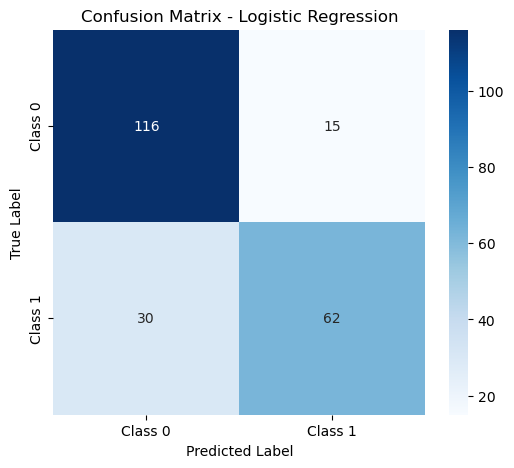

Logistic Regression - Accuracy: 0.80, Precision: 0.81, Recall: 0.67, F1 Score: 0.73, Error Rate: 0.20
Accuracy: 0.80
Precision: 0.81
Recall: 0.67
F1 Score: 0.73


In [205]:
conf_matrix_LR = confusion_matrix(y_test, logit_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

accuracy_LR = accuracy_score(y_test, logit_predictions)
precision_LR = precision_score(y_test, logit_predictions, zero_division=1)
recall_LR = recall_score(y_test, logit_predictions, zero_division=1)
f1_LR = f1_score(y_test, logit_predictions, zero_division=1)
error_rate_LR = 1 - accuracy_LR

print(f"Logistic Regression - Accuracy: {accuracy_LR:.2f}, Precision: {precision_LR:.2f}, Recall: {recall_LR:.2f}, F1 Score: {f1_LR:.2f}, Error Rate: {error_rate_LR:.2f}")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Decision Tree Classifier


In [197]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
ct_predictions = clf.predict(X_test)

## Plot Decision Tree

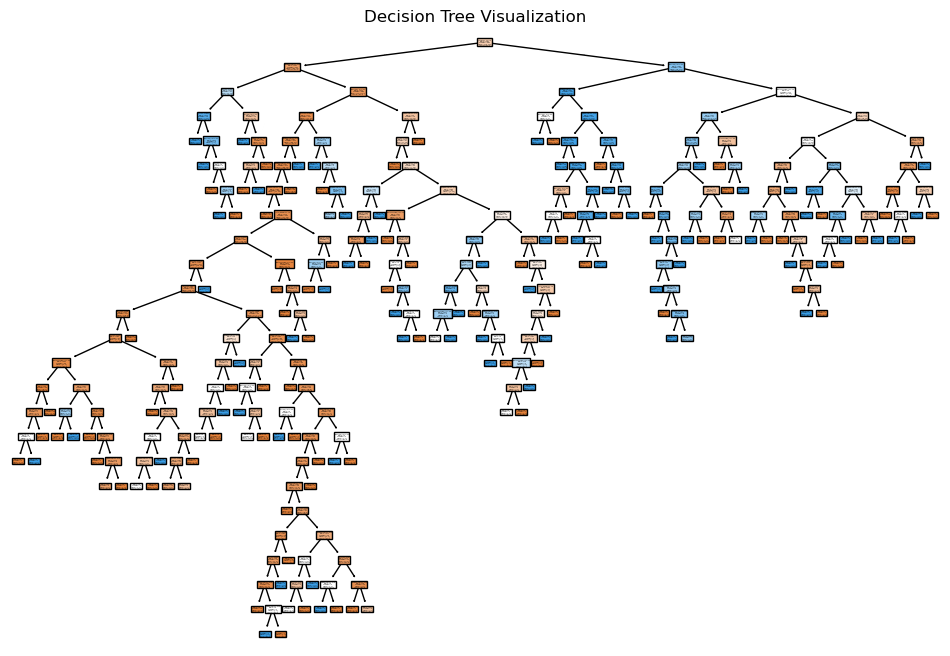

In [198]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Evaluate Decision Tree


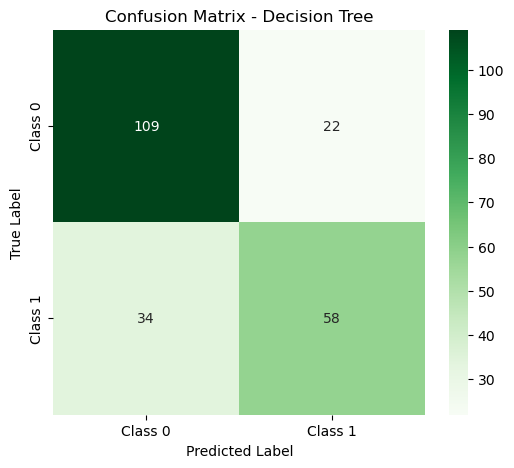

Decision Tree - Accuracy: 0.75, Precision: 0.72, Recall: 0.63, F1 Score: 0.67, Error Rate: 0.25


In [199]:
conf_matrix_CT = confusion_matrix(y_test, ct_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_CT, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

accuracy_CT = accuracy_score(y_test, ct_predictions)
precision_CT = precision_score(y_test, ct_predictions, zero_division=1)
recall_CT = recall_score(y_test, ct_predictions, zero_division=1)
f1_CT = f1_score(y_test, ct_predictions, zero_division=1)
error_rate_CT = 1 - accuracy_CT
print(f"Decision Tree - Accuracy: {accuracy_CT:.2f}, Precision: {precision_CT:.2f}, Recall: {recall_CT:.2f}, F1 Score: {f1_CT:.2f}, Error Rate: {error_rate_CT:.2f}")


# Random Forest Classifier


In [200]:
rf = RandomForestClassifier(n_estimators=100, random_state=12345)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

## Feature Importance Plot

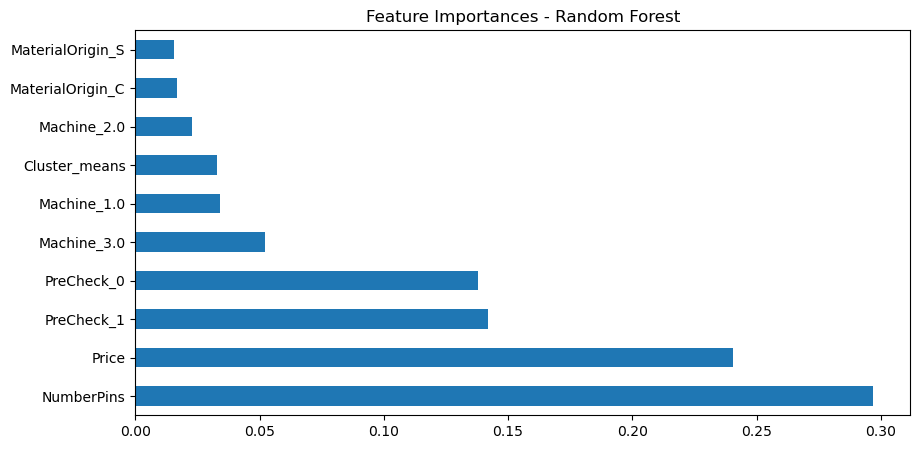

In [201]:
plt.figure(figsize=(10,5))
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances - Random Forest")
plt.show()

## Evaluate Random Forest


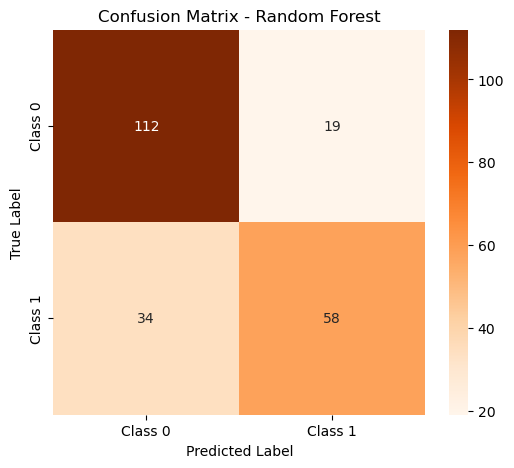

Random Forest - Accuracy: 0.76, Precision: 0.75, Recall: 0.63, F1 Score: 0.69, Error Rate: 0.24


In [202]:
conf_matrix_RF = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

accuracy_RF = accuracy_score(y_test, rf_predictions)
precision_RF = precision_score(y_test, rf_predictions, zero_division=1)
recall_RF = recall_score(y_test, rf_predictions, zero_division=1)
f1_RF = f1_score(y_test, rf_predictions, zero_division=1)
error_rate_RF = 1 - accuracy_RF

print(f"Random Forest - Accuracy: {accuracy_RF:.2f}, Precision: {precision_RF:.2f}, Recall: {recall_RF:.2f}, F1 Score: {f1_RF:.2f}, Error Rate: {error_rate_RF:.2f}")

# Compare Performance between Classification Methods

In [207]:
print(f"Logistic Regression: Accuracy={accuracy_LR:.2f}, Precision={precision_LR:.2f}, Recall={recall_LR:.2f}, "
      f"F1 Score={f1_LR:.2f}, Error Rate={1 - accuracy_LR:.2f}")

print(f"Decision Tree: Accuracy={accuracy_CT:.2f}, Precision={precision_CT:.2f}, Recall={recall_CT:.2f}, "
      f"F1 Score={f1_CT:.2f}, Error Rate={1 - accuracy_CT:.2f}")

print(f"Random Forest: Accuracy={accuracy_RF:.2f}, Precision={precision_RF:.2f}, Recall={recall_RF:.2f}, "
      f"F1 Score={f1_RF:.2f}, Error Rate={1 - accuracy_RF:.2f}")

Logistic Regression: Accuracy=0.80, Precision=0.81, Recall=0.67, F1 Score=0.73, Error Rate=0.20
Decision Tree: Accuracy=0.75, Precision=0.72, Recall=0.63, F1 Score=0.67, Error Rate=0.25
Random Forest: Accuracy=0.76, Precision=0.75, Recall=0.63, F1 Score=0.69, Error Rate=0.24
